<a href="https://colab.research.google.com/github/MidhaTahir/DEEP_LEARNING_/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [0]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

In [14]:
print(f'Train set: {len(x_train)} , Test set: {len(x_test)}')

Train set: 60000 , Test set: 10000


In [20]:
print(f'Shape of training set : {x_train.shape}')

Shape of training set : (60000, 28, 28)


In [16]:
print("Labels")

labels = {
0 : 'T-shirt/top',
1 :'Trouser',
2 :'Pullover',
3 :'Dress',
4 :'Coat',
5 : 'Sandal',
6 :'Shirt',
7 : 'Sneaker',
8 :'Bag',
9 :'Ankle boot'}
print(labels)

Labels
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [0]:
# plt.imshow(x_train[1],cmap="gray")
# plt.title(labels[y_train.argmax()])

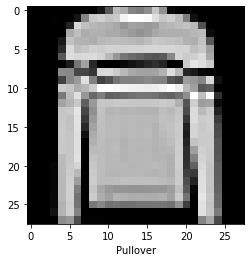

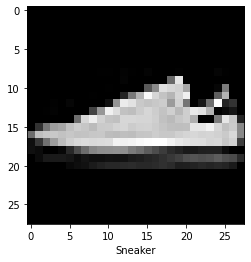

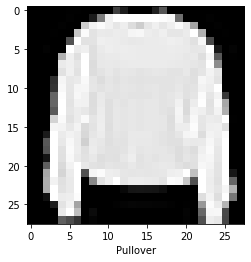

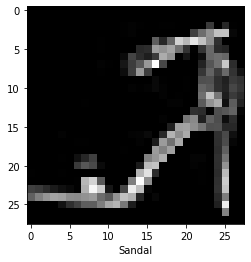

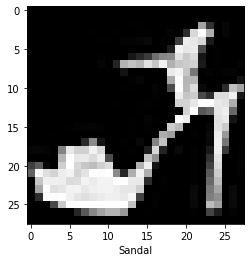

In [30]:
for i in range(5,10):
  plt.figure()
  plt.imshow(x_train[i],cmap="gray")
  plt.xlabel(labels[y_train[i]])
  plt.show()

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalizing data

In [51]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [0]:
model = Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(512, activation=tf.nn.relu),
  layers.Dense(10, activation=tf.nn.softmax)
])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = "rmsprop"
myloss = 'sparse_categorical_crossentropy'
metric = ['accuracy']
model.compile(optimizer= opt, 
              loss=myloss,
              metrics=metric)
#rmsprop , sparse_categorical_crossentropy, ['accuracy'] -> 88% 

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [0]:
callback = myCallback()

In [55]:
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2987 - accuracy: 0.9074
Epoch 2/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2891 - accuracy: 0.9092
Epoch 3/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2813 - accuracy: 0.9113
Epoch 4/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2829 - accuracy: 0.9129
Epoch 5/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2753 - accuracy: 0.9142
Epoch 6/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.2721 - accuracy: 0.9178
Epoch 7/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.2691 - accuracy: 0.9190
Epoch 8/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.2720 - accuracy: 0.9188
Epoch 9/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2708 - accuracy: 0.9

In [56]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.6158 - accuracy: 0.8770


[0.6157752795547247, 0.877]

----------------------TRYING ANOTHER APPROACH-------------------- converting to one hot encode and add to_categorical

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [0]:
model_2 = Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(512, activation=tf.nn.relu),
  layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
opt = "rmsprop"
myloss = 'categorical_crossentropy'
metric = ['accuracy']
model_2.compile(optimizer= opt, 
              loss=myloss,
              metrics=metric)

In [64]:
model_2.fit(x_train, y_train, epochs=10,batch_size=32,callbacks=None)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2986 - accuracy: 0.9060
Epoch 2/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2924 - accuracy: 0.9091
Epoch 3/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2903 - accuracy: 0.9107
Epoch 4/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.2825 - accuracy: 0.9128
Epoch 5/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2837 - accuracy: 0.9147
Epoch 6/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2800 - accuracy: 0.9149
Epoch 7/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.2767 - accuracy: 0.9168
Epoch 8/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2673 - accuracy: 0.9190
Epoch 9/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2696 - accuracy: 0.9

In [65]:
model_2.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.5939 - accuracy: 0.8864


[0.5938514353275299, 0.8864]

(1, 784)


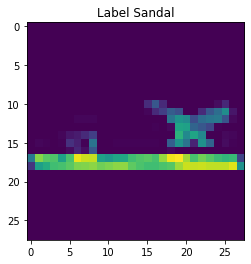

In [77]:
index = 90
x = x_test[index].reshape(-1,784)
print(x.shape) # (1,784)
plt.title("Label {}".format(labels[y_test[index].argmax()]))
plt.imshow(x_test[index].reshape(28,28), interpolation='none')